# imports

In [17]:
import pandas as pd
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt; plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns; sns.set(font='Malgun Gothic')
from scipy.stats import skew, kurtosis
import warnings; warnings.filterwarnings(action='ignore')
from IPython.core.display import display, HTML
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

In [18]:
from sklearn import datasets

# sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# preprocessing
from sklearn.impute import SimpleImputer, MissingIndicator, KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import Binarizer

# decomposition
from sklearn.decomposition import PCA

# estimators
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet

# boosting
from xgboost import XGBClassifier, XGBRegressor, XGBRFClassifier, XGBRFRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor

# neural
import tensorflow as tf; tf.random.set_seed(0)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ensemble
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

# curves
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV

# tools
import pycaret as pc
from pycaret.classification import *
# from pycaret.regression import *
import optuna

# read

In [19]:
train = pd.read_csv('./input/train.csv')
test  = pd.read_csv('./input/test.csv')
sub   = pd.read_csv('./input/sample_submission.csv')

In [20]:
train.shape, test.shape, sub.shape

((5497, 14), (1000, 13), (1000, 2))

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 101.7+ KB


In [23]:
sub.head()

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [24]:
exp_cla = setup(data=train, target='quality', session_id=0, 
# profile=True, 
)

,Description,Value
0,session_id,0
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(5497, 14)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [25]:
top2 = compare_models(fold=5, sort='Accuracy', n_select=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6473,0.6643,0.3370,0.6515,0.6327,0.4482,0.4542,0.2580
rf,Random Forest Classifier,0.6384,0.6572,0.3338,0.6459,0.6241,0.4344,0.4403,0.3280
catboost,CatBoost Classifier,0.6236,0.6415,0.3333,0.6187,0.6121,0.4182,0.4209,10.9900
lightgbm,Light Gradient Boosting Machine,0.6205,0.6373,0.3330,0.6158,0.6094,0.4133,0.4163,0.7700
xgboost,Extreme Gradient Boosting,0.6080,0.6353,0.3372,0.6008,0.5980,0.3960,0.3983,2.4880
gbc,Gradient Boosting Classifier,0.5734,0.6099,0.2801,0.5649,0.5588,0.3340,0.3387,2.7880
dt,Decision Tree Classifier,0.5467,0.5318,0.3253,0.5471,0.5464,0.3265,0.3267,0.0280
lda,Linear Discriminant Analysis,0.5303,0.5756,0.2757,0.5139,0.5069,0.2544,0.2617,0.0180
ridge,Ridge Classifier,0.5238,0.0000,0.2014,0.4781,0.4564,0.2113,0.2304,0.0100
lr,Logistic Regression,0.5207,0.5614,0.2169,0.4776,0.4764,0.2201,0.2324,2.3720


In [26]:
top2

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, 

In [27]:
tuned_models = []
for model in top2:
    tuned_models.append(tune_model(model, fold=5, n_iter=10, optimize='Accuracy', 
                        search_library='optuna', search_algorithm='tpe', choose_better=True))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6065,0.8104,0.2957,0.6106,0.5906,0.3832,0.3887
1,0.5974,0.7849,0.2757,0.6021,0.5766,0.3650,0.3714
2,0.6112,0.0000,0.3675,0.6331,0.5991,0.3900,0.3953
3,0.6086,0.7977,0.2986,0.6210,0.5919,0.3840,0.3904
4,0.6138,0.7957,0.2833,0.6163,0.5924,0.3910,0.3973
Mean,0.6075,0.6377,0.3042,0.6166,0.5901,0.3826,0.3886
SD,0.0056,0.3190,0.0327,0.0104,0.0074,0.0094,0.0092


In [28]:
tuned_models

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, 

In [31]:
evaluate_model(tuned_models[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

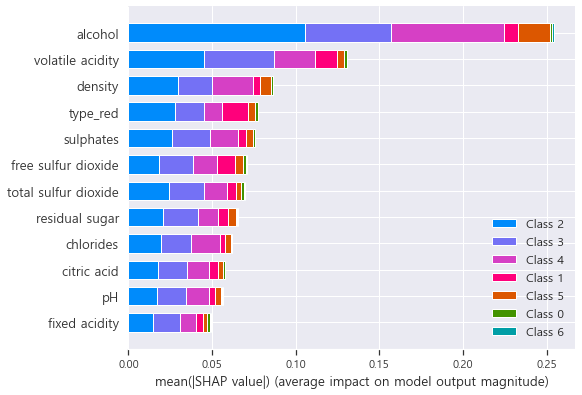

In [13]:
interpret_model(tuned_models[0])

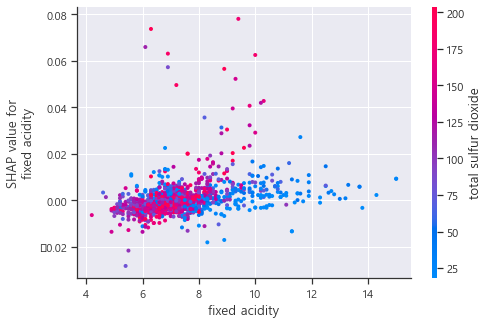

In [14]:
interpret_model(tuned_models[0], plot='correlation')

In [15]:
interpret_model(tuned_models[0], plot='reason')